In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('C:/Users/katya/StressCode/stressdataset/SaYoPillow.csv')
data

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [5]:
data.rename(columns={'sr': 'snoring rate', 'rr':'respiration rate', 't': 'body temperature', 'lm':'limb movement',
                            'bo':'blood oxygen', 'rem':'eye movement', 'sr.1':'sleeping hours', 'hr':'heart rate',
                            'sl':'stress level'}, inplace=True)
data.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

In [6]:
data.describe()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [ ]:
Class Distribution

In [7]:
data['stress level'].value_counts()

stress level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

In [ ]:
Data Visualization

<Axes: xlabel='stress level', ylabel='count'>

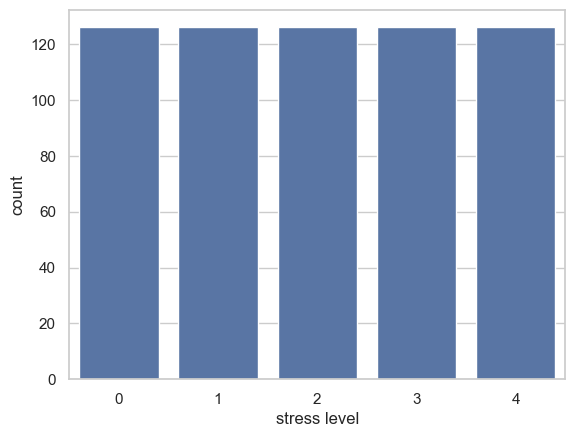

In [8]:
sns.set(style="whitegrid")
sns.countplot(x='stress level', data=data)

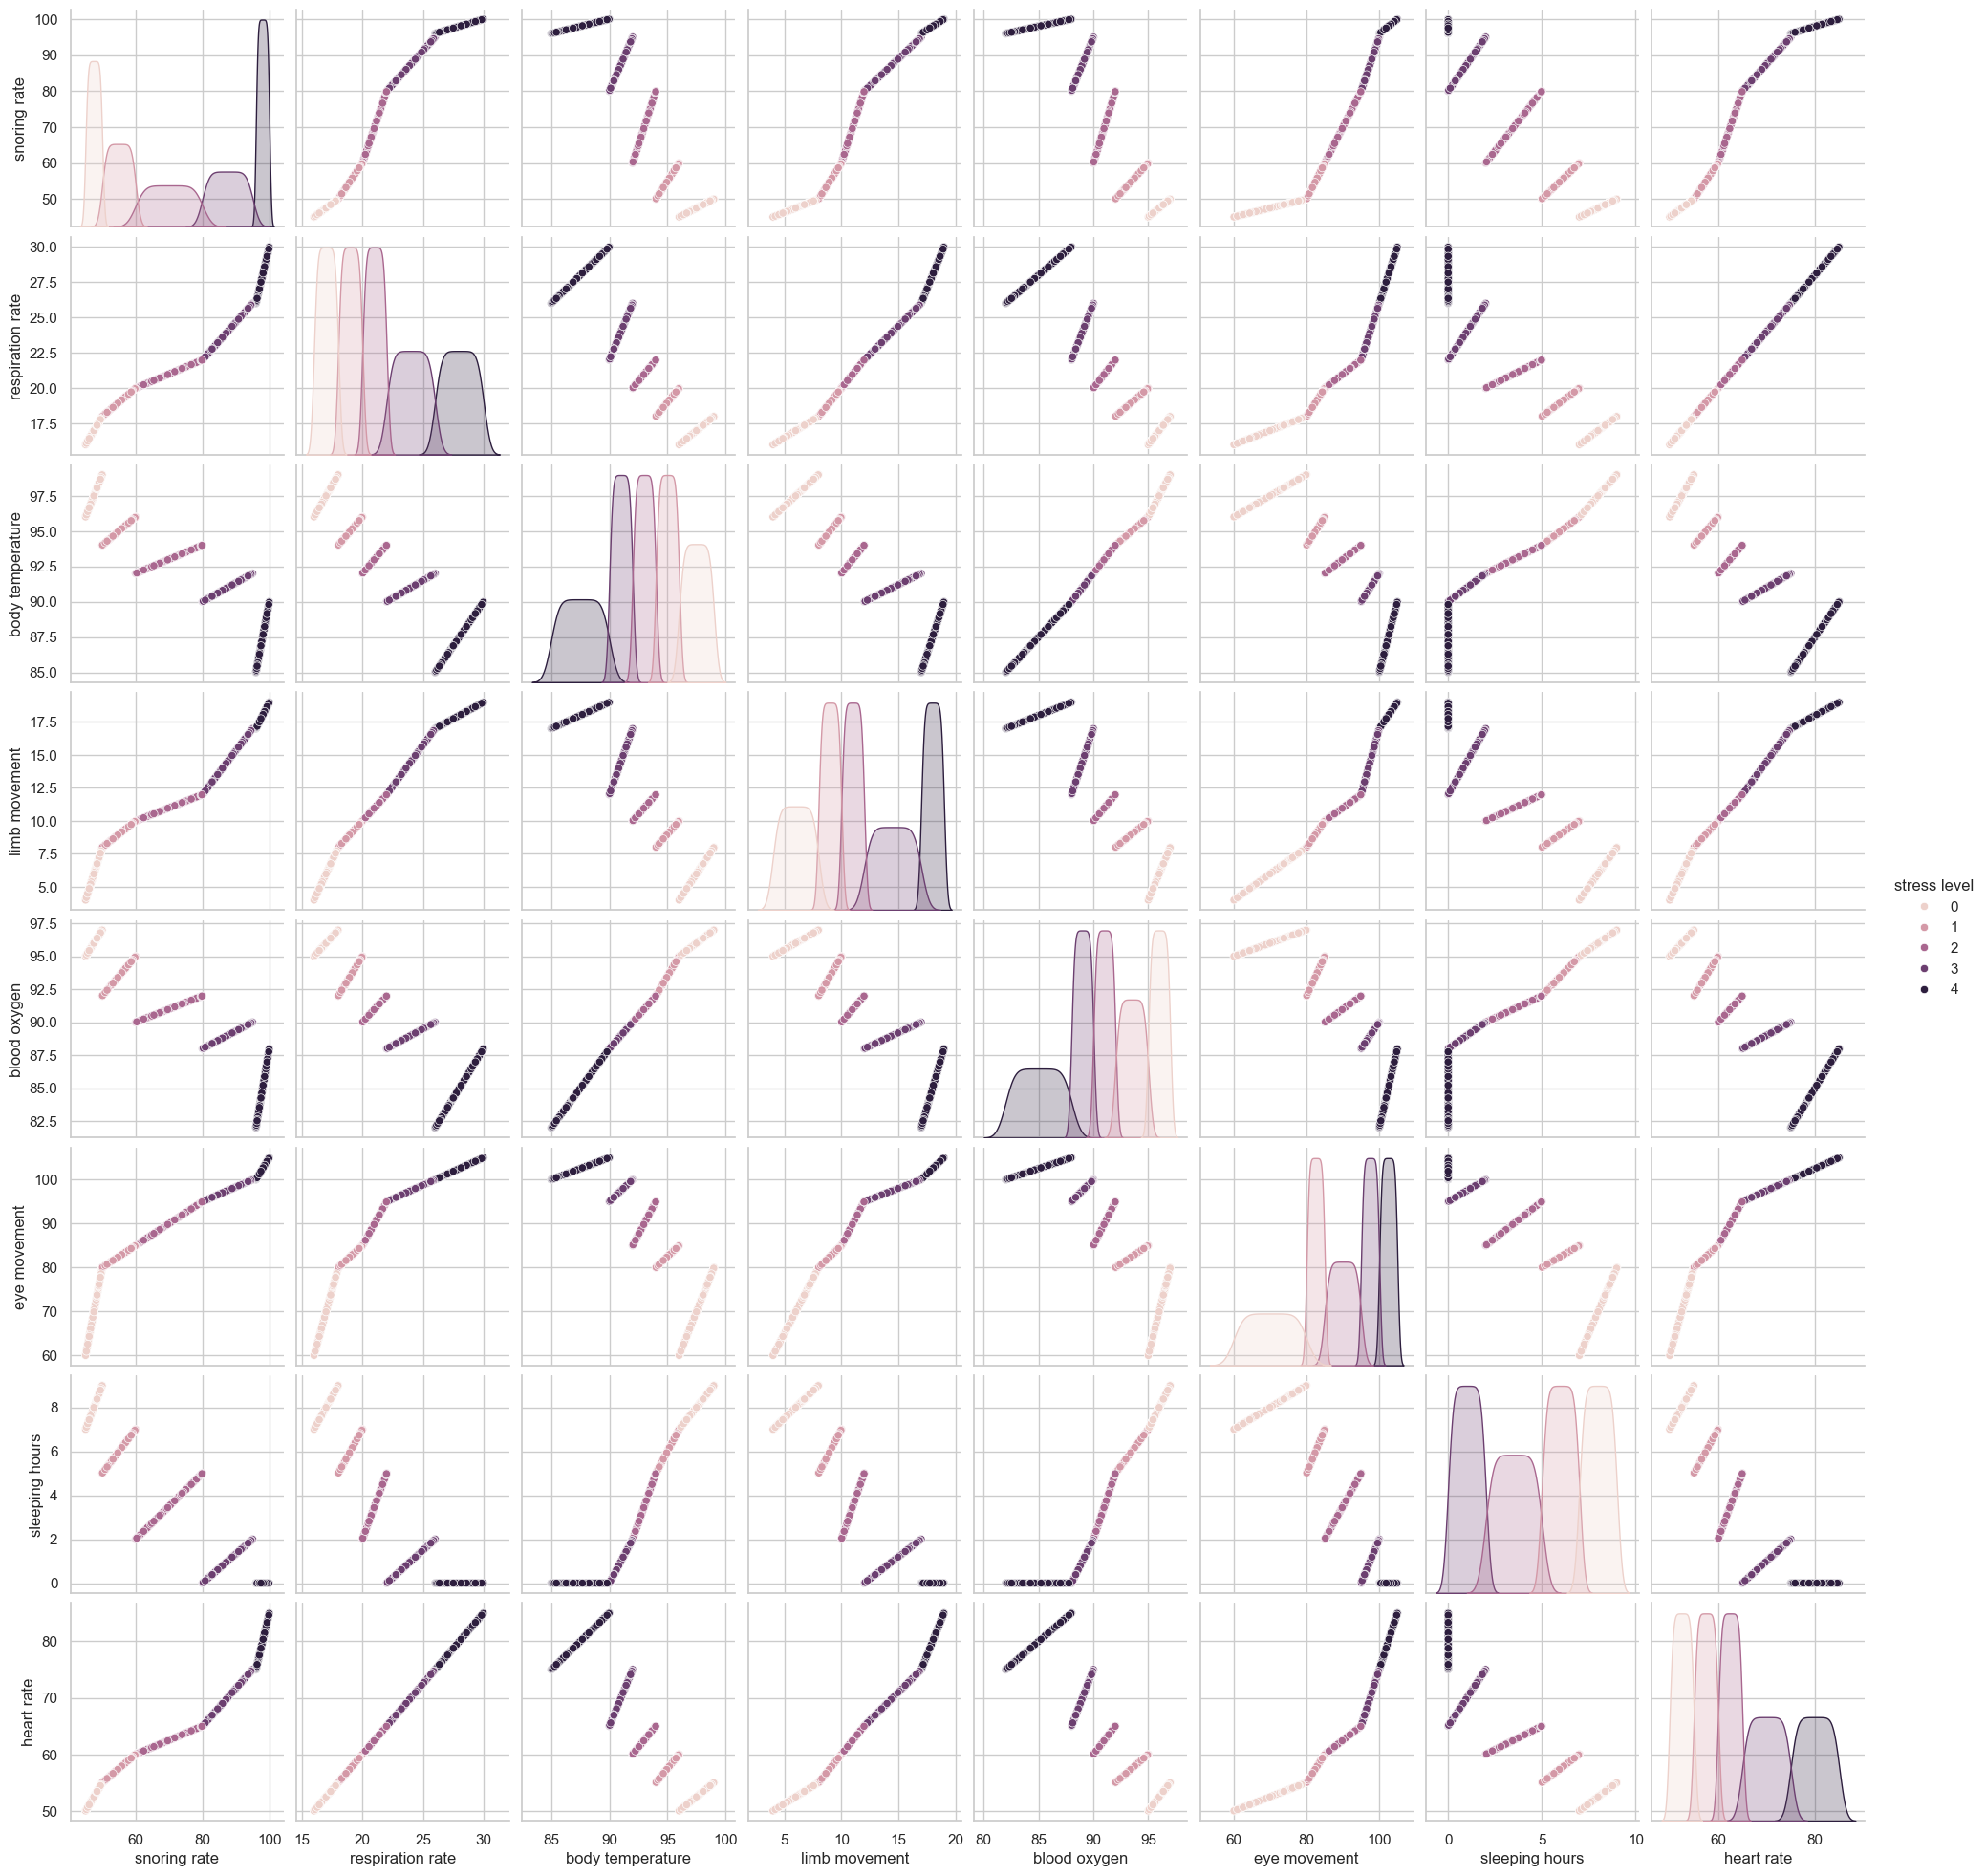

In [9]:
sns.pairplot(data, hue='stress level');

In [ ]:
Feature Scaling(every feature should contribute equally to the model)

In [10]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

X = data.drop('stress level', axis=1)
y = pd.DataFrame(data['stress level'])

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [ ]:
Feature Selection(picking only the most relevant features that actually affect your target (like stress level) and removing the rest.)

In [11]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X_scaled, y), columns=['MI Scores'], index=X_scaled.columns)
corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level']), columns=['Correlation'])
s_corr = pd.DataFrame(X_scaled[X_scaled.columns].corrwith(y['stress level'], method='spearman'),
                      columns=['Spearman_Correlation'])

relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
snoring rate,1.599607,0.975322,0.979788
respiration rate,1.594494,0.963516,0.979785
body temperature,1.593932,-0.962354,-0.979785
heart rate,1.593868,0.963516,0.979785
eye movement,1.592949,0.951988,0.979785
limb movement,1.591951,0.971071,0.979785
blood oxygen,1.591127,-0.961092,-0.979785
sleeping hours,1.574588,-0.973036,-0.983435


In [ ]:
Data Splitting

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42,
                                                      stratify = y, shuffle=True)

In [ ]:
Model Selection and Initial Evaluation
We have chosen the following machine learning models for stress level prediction:

Decision Tree Classifier
Logistic Regression
Gaussian Naive Bayes
Random Forest Classifier
k-Nearest Neighbors Classifier (KNN)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
lr = LogisticRegression()
gnb = GaussianNB()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()


models = [dtc, lr, gnb, rfc,  knn]
model_name = ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest',
              'KNN or k-Nearest Neighbors']

acc_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_model = round(accuracy_score(y_pred, y_valid) * 100, 2)
    acc_scores.append(acc_model)


In [14]:
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc.sort_values(by='Accuracy scores', ascending=False)

,Model name,Accuracy scores
1,Logistic Regression,100.00
4,KNN or k-Nearest Neighbors,100.00
2,Gaussian Naive Bayes,100.00
3,Random Forest,98.41
0,Decision Tree,96.83


In [ ]:
Cross-Validation

In [15]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
cv_mean_scores = []
for model in models:
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    cv_mean_scores.append(scores.mean()*100)

In [16]:
models_val = pd.DataFrame({'Model name': model_name, 'Cross validation mean scores': cv_mean_scores})
models_val.sort_values(by='Cross validation mean scores', ascending=False)

,Model name,Cross validation mean scores
1,Logistic Regression,100.000000
4,KNN or k-Nearest Neighbors,100.000000
2,Gaussian Naive Bayes,100.000000
3,Random Forest,98.941799
0,Decision Tree,98.571429


In [ ]:
Precision, Recall, and F1-Score

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = lr.predict(X_valid)

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_valid, y_pred, average='weighted'),
    recall_score(y_valid, y_pred, average='weighted'),
    f1_score(y_valid, y_pred, average='weighted')))

Precision score is: 1.000000 
Recall score is: 1.000000 
f1 score is: 1.000000


In [18]:
from sklearn.metrics import classification_report

report_svc = pd.DataFrame(classification_report(y_valid, y_pred, output_dict=True))
report_svc

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,25.0,25.0,25.0,26.0,25.0,1.0,126.0,126.0


In [ ]:
Classification Report

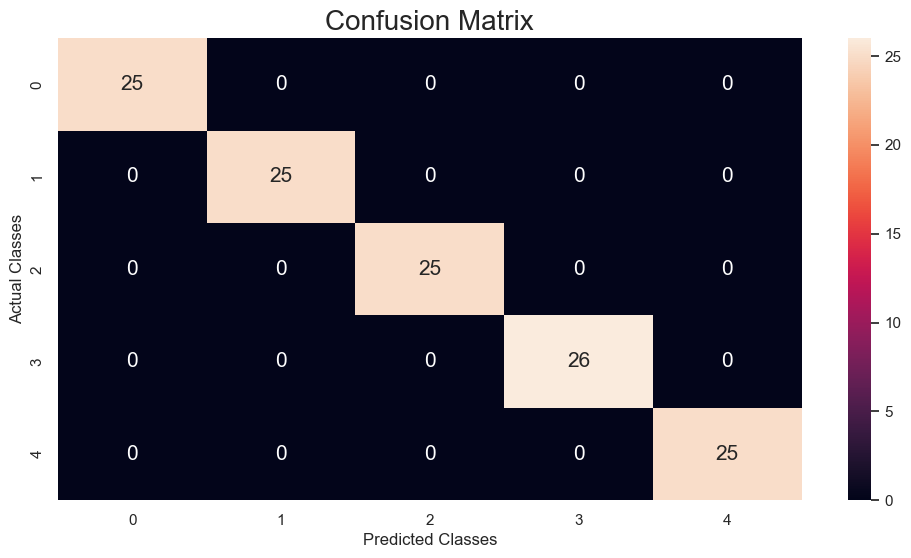

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)

cm_dataframe = pd.DataFrame(cm, columns=lr.classes_, index=lr.classes_)
plt.figure(figsize = (12,6));
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":15});
p.set_title('Confusion Matrix', fontsize=20);
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

In [21]:
stress_mapping = {
    0: 'No Stress',
    1: 'Low Stress',
    2: 'Moderate Stress',
    3: 'High Stress',
    4: 'Critical Stress'
}

def predict_stress_interactive():
    features = ['snoring rate', 'respiration rate', 'body temperature',
                'limb movement', 'blood oxygen', 'eye movement',
                'sleeping hours', 'heart rate']
    
    # Dictionary to store user inputs
    user_input = {}
    
    print("Please enter the following values:")
    for feature in features:
        while True:
            try:
                value = float(input(f"{feature}: "))
                user_input[feature] = value
                break
            except ValueError:
                print("Invalid input! Please enter a numeric value.")
    
    # Convert input to DataFrame
    input_df = pd.DataFrame([user_input])
    
    # Scale input using same scaler as training
    input_scaled = pd.DataFrame(scaler.transform(input_df), columns=input_df.columns)
    
    # Predict numeric label using trained model (e.g., lr)
    numeric_pred = lr.predict(input_scaled)[0]
    
    # Convert numeric prediction to text
    text_pred = stress_mapping[numeric_pred]
    
    print(f"\nPredicted Stress Level: {text_pred}")

# Call the interactive function
predict_stress_interactive()


Please enter the following values:


snoring rate:  34
respiration rate:  67
body temperature:  89
limb movement:  90
blood oxygen:  98
eye movement:  78
sleeping hours:  8
heart rate:  89



Predicted Stress Level: Critical Stress
